In [1]:
import pandas as pd
import numpy  as np

from scipy.stats import  mannwhitneyu

import matplotlib.pyplot as plt 
from matplotlib import ticker
from matplotlib.gridspec import GridSpec


from pathlib import Path

import time

import pickle

import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  nru_DE import DE_H_stats
from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "Macosko_GEO"

data_path = Path ( data_folder + data_subfolder )

In [3]:
# output plot
plot_jpg =  data_subfolder + "_Figure_7.jpg"

# output data
DE_stats_pkl = "DE_stats_SCT.pkl"


# input data - to calculate DE for SCTransform residuals
Pearson_residuals_pkl = "SCT_v2_Pearson_residuals_top_2000.pkl"   # Seurat output
clusters_pkl = "clusters.pkl"

# input data - Poisson model
DE_stats_Poisson_pkl = "DE_stats.pkl"
nru_dict_pkl =  "nru_dict.pkl"

# input data - SCTransform residual variance
S_g_pkl = "SCT_v2_residual_variance.pkl"



# path: output plot
plot_dsn = data_path / plot_jpg

# path: output data
DE_stats_dsn = data_path / DE_stats_pkl


# paths: input data
Pearson_residuals__dsn = data_path / Pearson_residuals_pkl
clusters_dsn = data_path / clusters_pkl
DE_stats_Poisson_dsn = data_path / DE_stats_Poisson_pkl
nru_dict_dsn = data_path / nru_dict_pkl
S_g_dsn = data_path / S_g_pkl

In [4]:
def list_top_n_H_stats ( df_plot, stat,  rank, n_top ):  
  df_plot_top = df_plot.loc [ df_plot[rank]<= n_top ] 
  h_values_top_list = df_plot_top[stat].values.tolist()    
  return  h_values_top_list	    	
			
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]

In [5]:
df_clusters = pd.read_pickle ( clusters_dsn )	
print ( '\n\n df_clusters'  )
print ( df_clusters  )

print ( '\n\n df_clusters.value_counts' )
print ( df_clusters['Cluster'].value_counts() )


df_residuals = pd.read_pickle ( Pearson_residuals__dsn )
print ( '\n\n df_residuals'  )
print ( df_residuals  )



 df_clusters
                 Cluster
Barcode                 
r4_TGCCACATGGGC       24
r4_ATCGGCTACCGA        2
r4_TAGATATCTTAT        2
r4_CCTGGATTGTAC        2
r4_CGGTAATAGGAA        2
...                  ...
p1_TCAAAAGCCGGG       24
p1_ATTAAGTTCCAA       34
p1_CTGTCTGAGACC        2
p1_TAACGCGCTCCT       24
p1_ATTCTTGTTCTT       24

[24769 rows x 1 columns]


 df_clusters.value_counts
24    15709
26     1321
25     1159
34      836
33      507
27      364
30      350
29      337
28      293
31      283
20      257
2       238
17      237
9       231
7       202
32      196
3       186
16      177
23      173
12      170
22      160
37      152
21      143
11      133
1       125
10      118
6       118
8       107
19       88
14       76
5        51
15       48
18       43
4        41
39       39
35       32
13       30
38       25
36       14
Name: Cluster, dtype: int64


 df_residuals
          r4_TGCCACATGGGC  r4_ATCGGCTACCGA  ...  p1_TAACGCGCTCCT  \
CARTPT          -0.692511 

In [6]:
start_time = time.time()
df_DE_stats_SCT = DE_H_stats ( df_residuals, df_clusters ).rename ( columns={'H_stat':'SCT_H_stat'} )
end_time = time.time()
elapsed = end_time - start_time
print ( 'function DE_H_stats time: ',  f"{ elapsed:.1f}", ' seconds'  )

print ( '\n df_DE_stats_SCT' )
print ( df_DE_stats_SCT  )
print ( '\n\n df_DE_stats_SCT.describe' )
print ( df_DE_stats_SCT.describe ( percentiles=pctl_list ) )

function DE_H_stats time:  28.7  seconds

 df_DE_stats_SCT
            SCT_H_stat  p_value
gene                           
CARTPT     6175.263289      0.0
RGS5       7156.136171      0.0
RHO       14632.843694      0.0
APOE       6906.295933      0.0
GLUL       4266.488889      0.0
...                ...      ...
CRHBP      7452.782045      0.0
CACNA2D2   4777.513589      0.0
ARL4C      5354.794440      0.0
HPCA       4805.514862      0.0
NUDT13     6363.541546      0.0

[2000 rows x 2 columns]


 df_DE_stats_SCT.describe
         SCT_H_stat        p_value
count   2000.000000   2.000000e+03
mean    4382.835282   1.164818e-22
std     2009.192653   4.281168e-21
min      174.879445   0.000000e+00
1%       462.238031   0.000000e+00
5%      1117.010997   0.000000e+00
10%     1835.670437   0.000000e+00
25%     2910.710469   0.000000e+00
50%     4328.330482   0.000000e+00
75%     5699.630730   0.000000e+00
90%     7004.682835   0.000000e+00
95%     7525.458384  6.428104e-209
99%     9772.9143

In [7]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_A_g = nru_dict['df_gene_stats'] [['A_g']]

df_S_g = pd.read_pickle ( S_g_dsn ).rename( columns={'residual_variance':'S_g'} )

df_gene_stats = pd.concat ( [ df_A_g, df_S_g ], axis=1 ) 
print ( '\n df_gene_stats' )
print ( df_gene_stats  )


 df_gene_stats
                     A_g        S_g
CARTPT         42.740254  78.880323
RGS5           17.483289  49.424522
RHO            15.539177   1.112457
APOE           14.865133  34.372010
GLUL           14.769975  24.736728
...                  ...        ...
RTN4R           0.337634   0.048592
GM25749         0.337634   0.060610
KIF26B          0.337634   0.062823
A330033J07RIK   0.337634   0.058539
RHOV            0.337634   0.064183

[13552 rows x 2 columns]


In [8]:
df_DE_stats_Poisson = pd.read_pickle ( DE_stats_Poisson_dsn )[['H_stat']].rename ( columns={'H_stat':'Poisson_H_stat'} )
df_DE_stats_compare_methods = pd.concat ( [ df_DE_stats_Poisson, df_DE_stats_SCT[['SCT_H_stat']] ], axis=1 )
print ( '\n df_DE_stats_compare_methods' )
print ( df_DE_stats_compare_methods  )
print ( '\n\n df_DE_stats_compare_methods.describe' )
print ( df_DE_stats_compare_methods.describe ( percentiles=pctl_list ) )


 df_DE_stats_compare_methods
          Poisson_H_stat   SCT_H_stat
gene                                 
TMTC3        6064.492535          NaN
CEP290       4431.562845  4046.124154
CCDC59       1908.837923  1801.084851
PPFIA2       1955.262838  1897.415936
LIN7A        5151.077040  5184.237816
...                  ...          ...
CRHBP                NaN  7452.782045
CACNA2D2             NaN  4777.513589
ARL4C                NaN  5354.794440
HPCA                 NaN  4805.514862
NUDT13               NaN  6363.541546

[2431 rows x 2 columns]


 df_DE_stats_compare_methods.describe
       Poisson_H_stat    SCT_H_stat
count     2000.000000   2000.000000
mean      5023.684580   4382.835282
std       2167.447149   2009.192653
min        217.795757    174.879445
1%         498.999122    462.238031
5%        1089.969799   1117.010997
10%       1985.038932   1835.670437
25%       3414.213758   2910.710469
50%       5304.321528   4328.330482
75%       6723.528704   5699.630730
90%       7384.

In [9]:
df_analy_stats =  df_gene_stats.merge ( df_DE_stats_compare_methods, how='inner', left_index=True, right_index=True ) 
print ( '\n df_analy_stats' )
print ( df_analy_stats  )
print ( '\n\n df_analy_stats.describe' )
print ( df_analy_stats.describe ( percentiles=pctl_list ) )


 df_analy_stats
                A_g        S_g  Poisson_H_stat    SCT_H_stat
CARTPT    42.740254  78.880323     6362.361890   6175.263289
RGS5      17.483289  49.424522     7204.638398   7156.136171
RHO       15.539177   1.112457    14558.389126  14632.843694
APOE      14.865133  34.372010     7535.834713   6906.295933
GLUL      14.769975  24.736728     5072.645723   4266.488889
...             ...        ...             ...           ...
CRHBP      1.087554   2.268255             NaN   7452.782045
CACNA2D2   1.086706   1.065071             NaN   4777.513589
ARL4C      1.083361   1.139026             NaN   5354.794440
HPCA       1.080899   1.050699             NaN   4805.514862
NUDT13     1.018903   1.527836             NaN   6363.541546

[2431 rows x 4 columns]


 df_analy_stats.describe
               A_g          S_g  Poisson_H_stat    SCT_H_stat
count  2431.000000  2431.000000     2000.000000   2000.000000
mean      1.687232     1.514243     5023.684580   4382.835282
std       1.4

In [10]:
df_plot_both =  df_analy_stats.dropna() 
print ( '\n df_plot_both' )
print ( df_plot_both  )
print ( '\n\n df_plot_both.describe' )
print ( df_plot_both.describe ( percentiles=pctl_list ) )
print (  '\n\n df_plot_both.corr:' )
print (  df_plot_both.corr(method='spearman') )


 df_plot_both
              A_g        S_g  Poisson_H_stat    SCT_H_stat
CARTPT  42.740254  78.880323     6362.361890   6175.263289
RGS5    17.483289  49.424522     7204.638398   7156.136171
RHO     15.539177   1.112457    14558.389126  14632.843694
APOE    14.865133  34.372010     7535.834713   6906.295933
GLUL    14.769975  24.736728     5072.645723   4266.488889
...           ...        ...             ...           ...
SLC3A2   1.274902   1.082902     3844.091818   3793.034607
OLFM3    1.274638   1.303574     6522.896490   6522.792386
HNRNPF   1.274598   1.062002     4253.920839   4181.871938
BIRC2    1.274568   1.101746     4323.763339   4313.878589
RBFOX1   1.274121   1.369653     5712.005588   5710.845706

[1569 rows x 4 columns]


 df_plot_both.describe
               A_g          S_g  Poisson_H_stat    SCT_H_stat
count  1569.000000  1569.000000     1569.000000   1569.000000
mean      1.869402     1.843958     4670.197693   4597.497922
std       1.697362     3.106166     2129.

In [11]:
df_plot_SCT = df_analy_stats[[  'SCT_H_stat', 'S_g']].dropna() 
df_plot_SCT = df_plot_SCT.assign( rank_S_g = df_plot_SCT['S_g'].rank ( ascending=False ).values,
                      rank_SCT_H_stat = df_plot_SCT['SCT_H_stat'].rank ( ascending=False ).values )
print ( '\n df_plot_SCT' )
print ( df_plot_SCT  )


 df_plot_SCT
            SCT_H_stat        S_g  rank_S_g  rank_SCT_H_stat
CARTPT     6175.263289  78.880323       1.0            395.0
RGS5       7156.136171  49.424522       2.0            162.0
RHO       14632.843694   1.112457    1537.0              1.0
APOE       6906.295933  34.372010       3.0            224.0
GLUL       4266.488889  24.736728       4.0           1027.0
...                ...        ...       ...              ...
CRHBP      7452.782045   2.268255     156.0            115.0
CACNA2D2   4777.513589   1.065071    1854.0            829.0
ARL4C      5354.794440   1.139026    1372.0            613.0
HPCA       4805.514862   1.050699    1956.0            822.0
NUDT13     6363.541546   1.527836     363.0            350.0

[2000 rows x 4 columns]


In [13]:
df_plot_Poisson = df_analy_stats[[ 'Poisson_H_stat', 'A_g']].dropna()   
df_plot_Poisson = df_plot_Poisson.assign( rank_A_g = df_plot_Poisson['A_g'].rank ( ascending=False ).values,
                      rank_Poisson_H_stat = df_plot_Poisson['Poisson_H_stat'].rank ( ascending=False ).values )
print ( '\n df_plot_Poisson' )
print ( df_plot_Poisson  )


 df_plot_Poisson
        Poisson_H_stat        A_g  rank_A_g  rank_Poisson_H_stat
CARTPT     6362.361890  42.740254       1.0                647.0
RGS5       7204.638398  17.483289       2.0                268.0
RHO       14558.389126  15.539177       3.0                  1.0
APOE       7535.834713  14.865133       4.0                139.0
GLUL       5072.645723  14.769975       5.0               1090.0
...                ...        ...       ...                  ...
RBFOX1     5712.005588   1.274121    1996.0                859.0
CBLL1      5430.357553   1.273923    1997.0                961.0
ADRA2A     7382.560303   1.273879    1998.0                203.0
ENO3       6296.365304   1.273819    1999.0                670.0
KIFC3      6978.688915   1.273653    2000.0                391.0

[2000 rows x 4 columns]


In [14]:
df_SCT_quartiles_list = []
df_Poisson_quartlies_list = []

boxplot_DE_list = []
label_list = []

for group in range(10):
  n_top = 100 * ( 1 + group )

  h_values_SCT_top_list = list_top_n_H_stats ( df_plot_SCT, 'SCT_H_stat', 'rank_S_g', n_top )
  boxplot_DE_list.append ( h_values_SCT_top_list )
  df_SCT_H_stats = pd.DataFrame ( data = h_values_SCT_top_list, columns=[n_top] )
  df_quartiles = df_SCT_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_SCT_quartiles_list.append ( df_quartiles )
  
  h_values_nru_top_list = list_top_n_H_stats ( df_plot_Poisson, 'Poisson_H_stat', 'rank_A_g', n_top )
  boxplot_DE_list.append ( h_values_nru_top_list )
  df_Poisson_H_stats = pd.DataFrame ( data = h_values_nru_top_list, columns=[n_top] )
  df_quartiles = df_Poisson_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_Poisson_quartlies_list.append ( df_quartiles )
  
  label_list.extend (  [ str(n_top) + ' \n ' + '$S_g$',   str(n_top) + ' \n ' + '$A_g$', ] )

In [15]:
df_SCT_quartiles = pd.concat ( df_SCT_quartiles_list, axis=1, sort=False )
print ( '\n df_SCT_quartiles' )
print ( df_SCT_quartiles  )


 df_SCT_quartiles
               100           200   ...          900           1000
count    100.000000    200.000000  ...    900.000000   1000.000000
mean    6861.662542   6529.041206  ...   5153.516529   5045.267269
std     1364.790129   1648.435795  ...   2099.186721   2109.637545
min     1025.550767    833.048082  ...    174.879445    174.879445
25%     6356.641787   5755.620776  ...   3770.330188   3575.832709
50%     7166.176944   7000.622587  ...   5325.964652   5195.452516
75%     7601.251557   7532.434546  ...   6690.477258   6615.551514
max    10567.173954  11610.765305  ...  13269.100902  13518.935890

[8 rows x 10 columns]


In [16]:
df_Poisson_quartiles = pd.concat ( df_Poisson_quartlies_list, axis=1, sort=False )
print ( '\n df_Poisson_quartiles' )
print ( df_Poisson_quartiles  )


 df_Poisson_quartiles
               100           200   ...          900           1000
count    100.000000    200.000000  ...    900.000000   1000.000000
mean    7761.486737   7144.952590  ...   5385.309730   5305.424258
std     2741.341577   2533.682821  ...   2361.709723   2326.564657
min     1313.310273    364.731892  ...    339.699845    339.699845
25%     6547.166651   6083.918384  ...   3817.545448   3738.061149
50%     7522.018312   7251.000286  ...   5698.722522   5657.873575
75%     8502.511090   7837.352114  ...   7074.840630   6976.094879
max    14558.389126  14558.389126  ...  14558.389126  14558.389126

[8 rows x 10 columns]


In [17]:
# compare distributions of H-statistics for genes with highest scores

tuple_list_greater = []

for group in range(10):
  n = 100 * ( 1 + group ) 
  n_SCT = 2 * group
  n_Poisson = 1 + n_SCT
  list_SCT = boxplot_DE_list[ n_SCT ]
  list_Poisson = boxplot_DE_list [ n_Poisson ]

  MW_stat, MW_pv = mannwhitneyu( list_Poisson, list_SCT, alternative='greater' )     
  tuple_list_greater.append ( ( n , MW_stat, MW_pv ) )  

df_DE_stats_greater = pd.DataFrame ( data = tuple_list_greater, columns= ['genes', 'MW_stat', 'MW_pv'] ).set_index ( ['genes'] )
print ( '\n df_DE_stats_greater' )
print ( df_DE_stats_greater  )


 df_DE_stats_greater
        MW_stat     MW_pv
genes                    
100      6035.0  0.005741
200     23591.0  0.000950
300     49956.0  0.009795
400     87925.0  0.007657
500    135217.0  0.012636
600    194271.0  0.008717
700    261596.0  0.014113
800    339852.0  0.015844
900    434604.0  0.003627
1000   540304.0  0.000901


In [18]:
# for genes with highest scores for each method, compute Speraman correlation of scores with H-statistics

corr_tuple_list = []

top_rank_list = [50, 100, 200, 500, 1000, 2000]

for top_rank in top_rank_list:
  df_SCT_top_rank = df_plot_SCT.loc [ df_plot_SCT['rank_SCT_H_stat'] <= top_rank ].sort_values ( ['rank_SCT_H_stat'] )
  df_corr = df_SCT_top_rank[['SCT_H_stat', 'S_g']].corr ( method='spearman' )
  SCT_corr = df_corr.at['SCT_H_stat','S_g']
 
  df_Poisson_top_rank = df_plot_Poisson.loc [ df_plot_Poisson['rank_Poisson_H_stat'] <= top_rank ].sort_values ( ['rank_Poisson_H_stat'] )
  df_corr = df_Poisson_top_rank[[ 'Poisson_H_stat', 'A_g']].corr ( method='spearman' )
  Poisson_corr = df_corr.at['Poisson_H_stat', 'A_g'] 
  
  corr_tuple_list.append ( ( top_rank, SCT_corr, Poisson_corr ) ) 
  
  
df_corr_compare = pd.DataFrame ( data = corr_tuple_list, columns=[ 'genes', 'S_g', 'A_g' ] ).set_index ( ['genes'] )
print ( '\n Table 8 \n Spearman correlations of H-statistics with S_g and A_g \n for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics \n' )
print ( df_corr_compare  )


 Table 8 
 Spearman correlations of H-statistics with S_g and A_g 
 for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics 

            S_g       A_g
genes                    
50    -0.486579  0.521345
100   -0.087765  0.420930
200    0.080882  0.605961
500    0.375839  0.422817
1000   0.483903  0.309527
2000   0.420156  0.206992


C:\Users\vfkle\AppData\Local\Temp\ipykernel_4584\2978470447.py:97: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust( left=0.07, right=0.98, bottom=0.1,  top=0.95, wspace=0.25, hspace=0.3 )


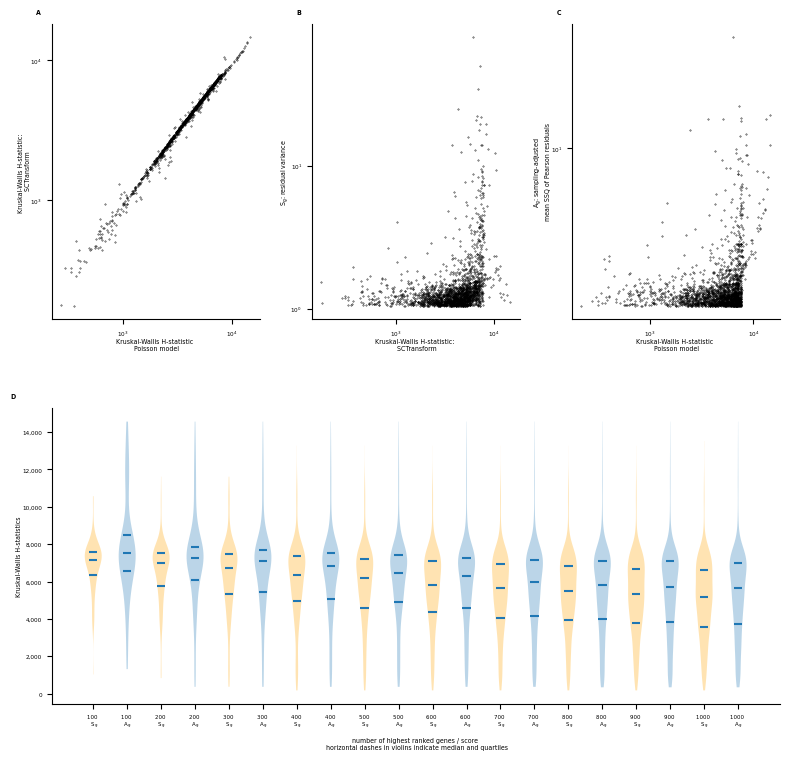

In [19]:
fig = plt.figure(constrained_layout=True, figsize=( 8, 8 ) )

gs = GridSpec( 2, 3  )

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

######

ax1.scatter ( df_plot_both[ 'Poisson_H_stat' ],df_plot_both['SCT_H_stat'], marker='o', color='k',  s=0.1)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel ( 'Kruskal-Wallis H-statistic \n Poisson model', fontsize=4.5, labelpad=-0.20 )	  
ax1.set_ylabel ( 'Kruskal-Wallis H-statistic: \n SCTransform',fontsize=4.5, labelpad=-0.20 )
ax1.tick_params(labelsize=4.1, which='major' )    
ax1.minorticks_off()
	
right = ax1.spines["right"]	
right.set_visible(False)
top = ax1.spines["top"]	
top.set_visible(False)

ax1.text(-0.05, 1.05, 'A', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax1.transAxes,)



ax2.scatter ( df_plot_SCT[ 'SCT_H_stat' ],df_plot_SCT['S_g'], marker='o', color='k',  s=0.1)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel ( 'Kruskal-Wallis H-statistic: \n SCTransform',fontsize=4.5, labelpad=-0.20 )	
ax2.set_ylabel ( '$S_g$: residual variance', fontsize=4.5, labelpad=-0.20 )	  
ax2.tick_params(labelsize=4.1, which='major' )    
ax2.minorticks_off()
	
right = ax2.spines["right"]	
right.set_visible(False)
top = ax2.spines["top"]	
top.set_visible(False)

ax2.text(-0.05, 1.05, 'B', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax2.transAxes,)



ax3.scatter ( df_plot_Poisson[ 'Poisson_H_stat' ],df_plot_Poisson['A_g'] , marker='o', color='k',  s=0.1)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel ( 'Kruskal-Wallis H-statistic \n Poisson model',fontsize=4.5, labelpad=-0.20 )	
ax3.set_ylabel ( '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', fontsize=4.5, labelpad=-0.20 )	  
ax3.tick_params(labelsize=4.1, which='major' )    
ax3.minorticks_off()
	
right = ax3.spines["right"]	
right.set_visible(False)
top = ax3.spines["top"]	
top.set_visible(False)

ax3.text(-0.05, 1.05, 'C', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax3.transAxes,)
 


params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params) 
 
n_groups = len ( boxplot_DE_list ) 
 
violin_parts = ax4.violinplot( boxplot_DE_list , showextrema = False,   showmedians = True, quantiles= n_groups* [[.25,.75]] )

for i_sct in range ( n_groups // 2 ):
  pc = violin_parts['bodies'][2*i_sct]
  pc.set_facecolor('orange')


ax4.set_xticks( list ( range ( 1,  1 + n_groups ) ) )

ax4.tick_params(labelsize=4.1)   
ax4.set_xticklabels( label_list, fontsize=3.9 )  

ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax4.set_xlabel ( '\n number of highest ranked genes / score  \n horizontal dashes in violins indicate median and quartiles', fontsize=4.5, labelpad=-0.0 )
ax4.set_ylabel ( 'Kruskal-Wallis H-statistics',fontsize=4.5, labelpad=-0.20 )	
  
	
right = ax4.spines["right"]	
right.set_visible(False)
top = ax4.spines["top"]	
top.set_visible(False)
  
ax4.text(-0.05, 1.05, 'D', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax4.transAxes,) 
      


plt.subplots_adjust( left=0.07, right=0.98, bottom=0.1,  top=0.95, wspace=0.25, hspace=0.3 )
  
plt.savefig( plot_dsn, transparent=True, dpi=300 ) 

In [20]:
df_DE_stats_SCT.to_pickle ( DE_stats_dsn )